In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_context("talk")


In [2]:
# Load dataset
sales_path = "../data/raw/sales.csv"
df = pd.read_csv(sales_path, parse_dates=["week"])
df.head()

,partner_id,sku_id,category,price,lead_time_weeks,week,sales_units
0,P1,S001,tops,118,1,2022-01-03,7
1,P1,S002,outerwear,45,4,2022-01-03,9
2,P1,S003,dresses,67,3,2022-01-03,1
3,P1,S004,shoes,80,2,2022-01-03,26
4,P1,S005,shoes,84,2,2022-01-03,25


In [3]:
# data overview
print("Data Shape:", df.shape)
print("Data Types:\n", df.dtypes)
df.info()

Data Shape: (26000, 7)
Data Types:
 partner_id                 object
sku_id                     object
category                   object
price                       int64
lead_time_weeks             int64
week               datetime64[ns]
sales_units                 int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   partner_id       26000 non-null  object        
 1   sku_id           26000 non-null  object        
 2   category         26000 non-null  object        
 3   price            26000 non-null  int64         
 4   lead_time_weeks  26000 non-null  int64         
 5   week             26000 non-null  datetime64[ns]
 6   sales_units      26000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.4+ MB


In [4]:
df.describe(include="all").T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
partner_id,26000,5,P1,5200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sku_id,26000,50,S001,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,26000,4,outerwear,8320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,26000.0,NaN,NaN,NaN,86.06,25.0,60.0,81.0,116.0,145.0,34.402644
lead_time_weeks,26000.0,NaN,NaN,NaN,2.524,1.0,2.0,2.5,3.0,4.0,1.09246
week,26000,NaN,NaN,NaN,2022-12-29 11:59:59.999999744,2022-01-03 00:00:00,2022-07-02 06:00:00,2022-12-29 12:00:00,2023-06-27 18:00:00,2023-12-25 00:00:00,NaN
sales_units,26000.0,NaN,NaN,NaN,20.865462,0.0,10.0,20.0,30.0,68.0,13.701414


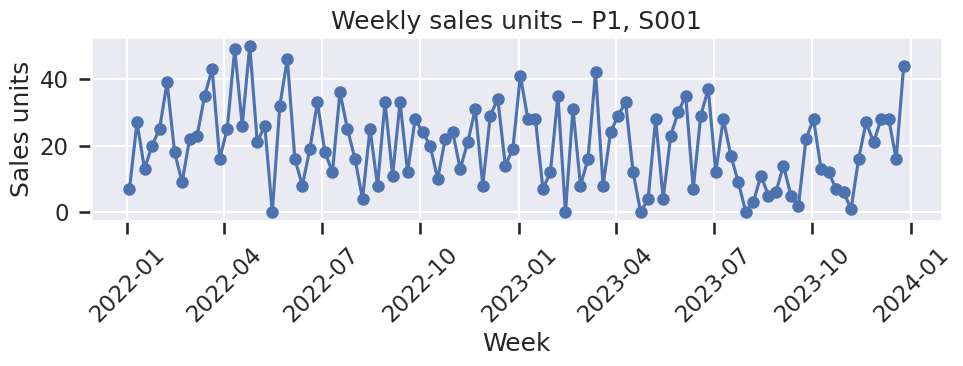

In [6]:
# Data visualization
sample_partner = df["partner_id"].iloc[0]
sample_sku = df["sku_id"].iloc[0]

mask = (df["partner_id"] == sample_partner) & (df["sku_id"] == sample_sku)
df_sample = df.loc[mask].sort_values("week")
df_sample.head()

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df_sample["week"], df_sample["sales_units"], marker="o")
ax.set_title(f"Weekly sales units – {sample_partner}, {sample_sku}")
ax.set_xlabel("Week")
ax.set_ylabel("Sales units")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


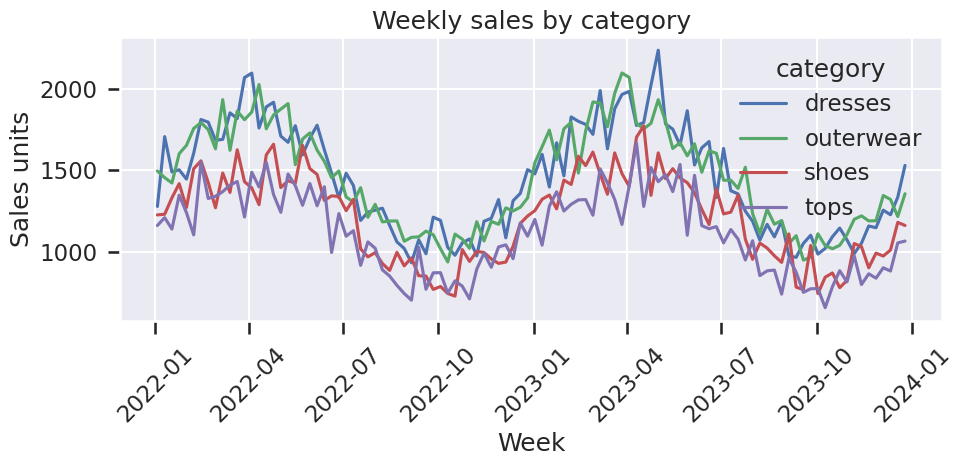

In [7]:
df_cat = (
    df.groupby(["week", "category"])["sales_units"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df_cat,
    x="week",
    y="sales_units",
    hue="category",
)
plt.title("Weekly sales by category")
plt.xlabel("Week")
plt.ylabel("Sales units")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
